In [1]:
import pandas as pd

train_set = pd.read_csv("./data/train.csv")
test_set = pd.read_csv("./data/test.csv")


In [2]:
train_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_set.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

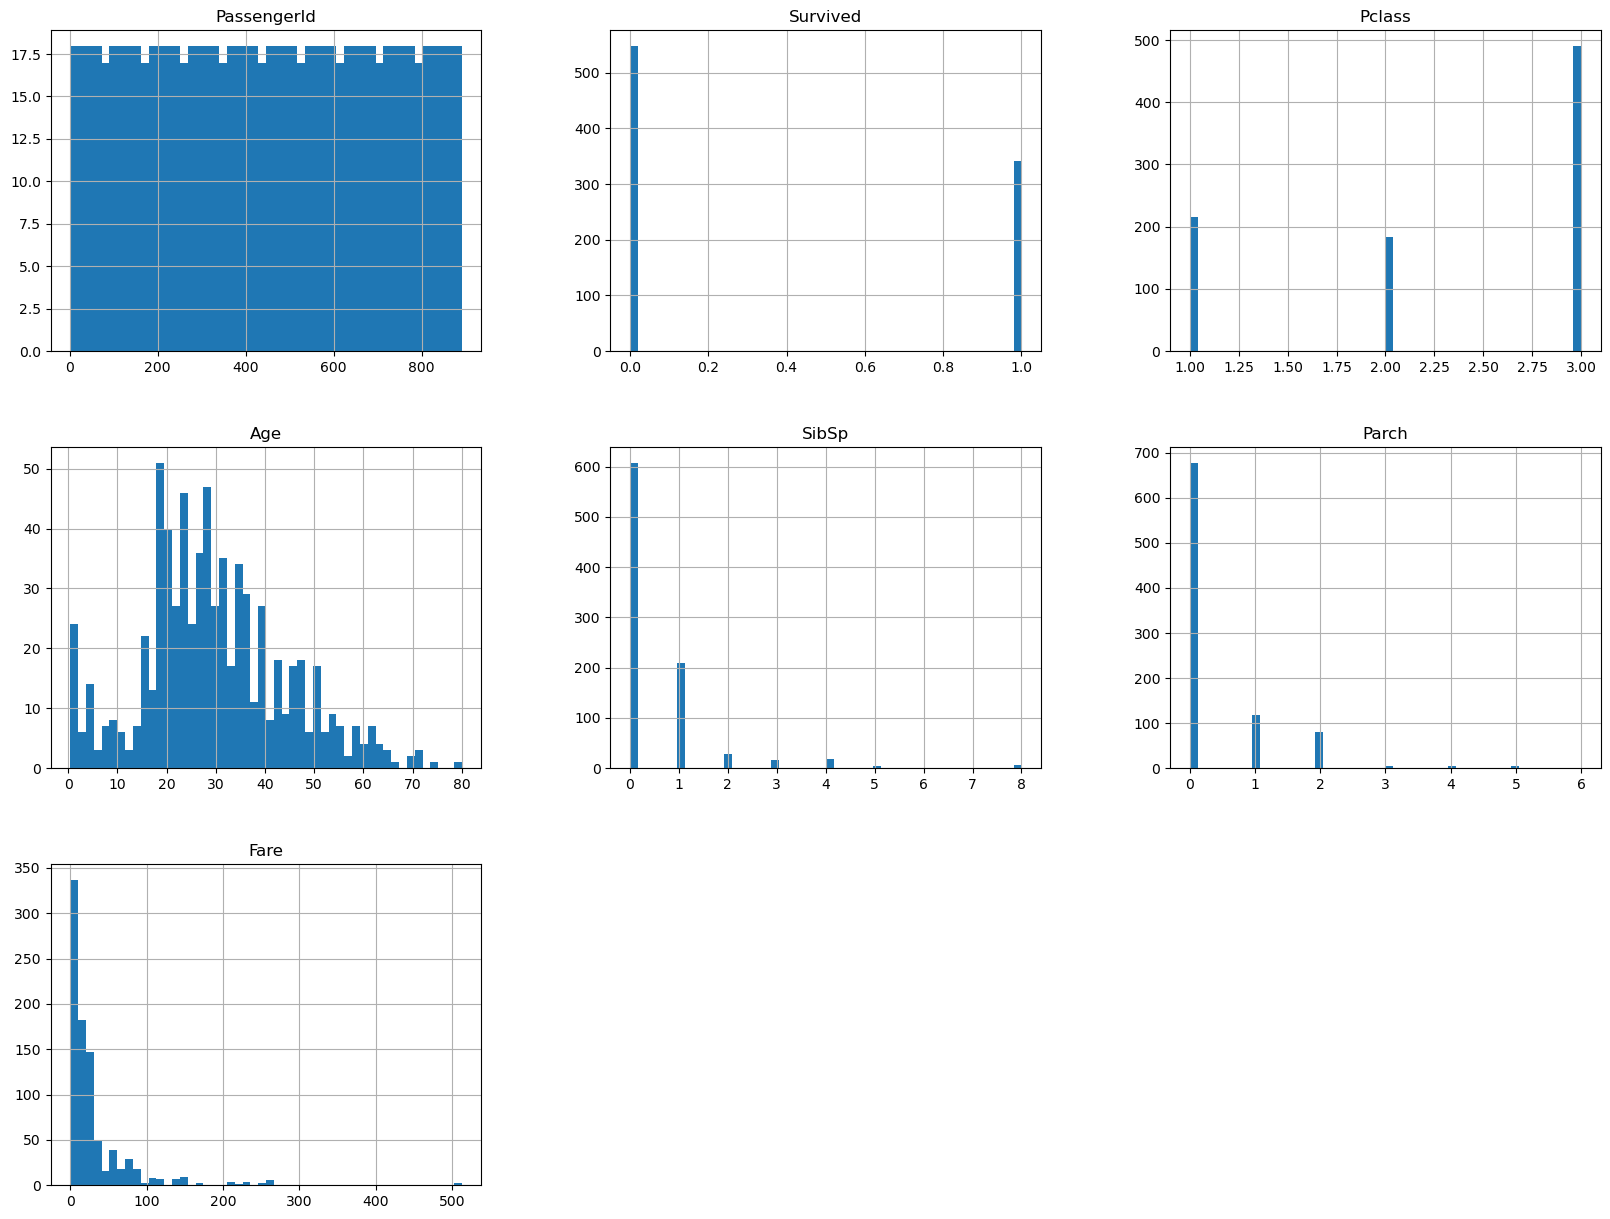

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

train_set.hist(bins=50, figsize=(20,15))


In [6]:
train_set.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_set.shape


(891, 12)

In [8]:
train_set[["Age", "Survived", "Sex"]].head(50)


,Age,Survived,Sex
0,22.0,0,male
1,38.0,1,female
2,26.0,1,female
3,35.0,1,female
4,35.0,0,male
5,NaN,0,male
6,54.0,0,male
7,2.0,0,male
8,27.0,1,female
9,14.0,1,female


In [9]:
men = train_set.loc[train_set.Sex == "male"] ["Survived"]
men_rate = sum(men) / len(men)
print(men_rate)


0.18890814558058924


In [10]:
women = train_set.loc[train_set.Sex == "female"] ["Survived"]
women_rate = sum(women) / len(women)
print(women_rate)


0.7420382165605095


In [11]:
train_set.groupby(['Survived']).count()['PassengerId']


Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [12]:
train_set.groupby(['Survived', 'Sex']).count()['PassengerId']


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [13]:
train_set["Age"].median()


28.0

In [14]:
train_set["Age"] = train_set["Age"].fillna(28.0)


In [15]:
train_set[['Survived', 'Sex', 'Age', 'Pclass']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [16]:
train_set["Sex"] = train_set["Sex"].map({'female': 1, 'male': 0}).astype(int)


In [17]:
train_set[["Survived", "Sex",  "Age", "Pclass"]].head(3)


,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


In [18]:
import numpy as np

train_set['Alone'] = np.where(
    (train_set['SibSp'] == 0) & (train_set['Parch'] == 0),1,0)


In [19]:
train_set[["Survived", "Sex",  "Age", "Pclass", "Alone"]].head(3)


,Survived,Sex,Age,Pclass,Alone
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


In [20]:
grouped_accompanied_people = train_set.groupby(["Sex", "Alone", "Survived"]).count()["PassengerId"]
print(grouped_accompanied_people)


Sex  Alone  Survived
0    0      0           121
            1            45
     1      0           347
            1            64
1    0      0            54
            1           134
     1      0            27
            1            99
Name: PassengerId, dtype: int64


In [21]:
grouped_accompanied_people.unstack(level=0)


Sex               0    1
Alone Survived          
0     0         121   54
      1          45  134
1     0         347   27
      1          64   99

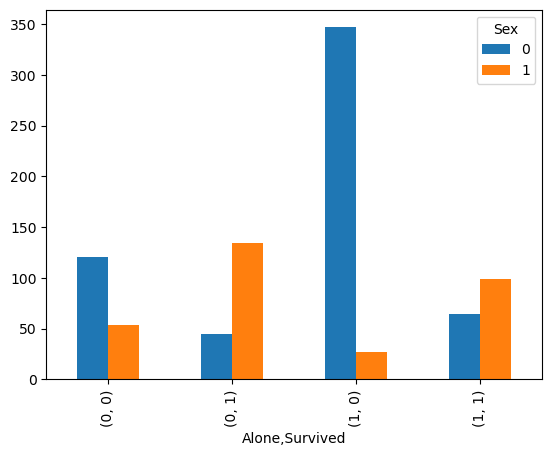

In [22]:
(grouped_accompanied_people.unstack(level=0).plot.bar())
plt.show()


In [23]:
y_train = train_set['Survived']
features = ["Sex", "Age", "Alone", "Pclass"]
X_train = train_set[features]
print(y_train.shape, X_train.shape)


(891,) (891, 4)


In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [27]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

def conf_mat_acc(model):
    disp = ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, cmap="Blues")
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print('Accuracy: ', np.round(accuracy, 2))
    plt.show()


Accuracy:  0.79


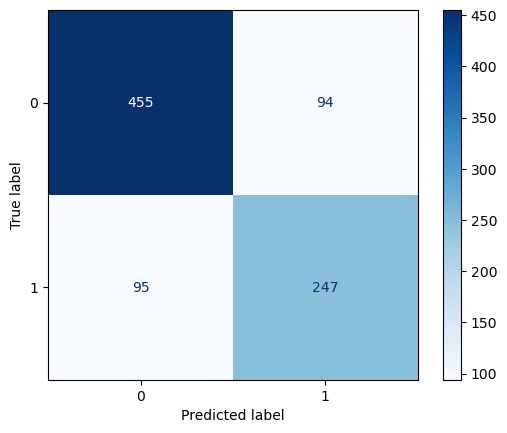

In [40]:
conf_mat_acc(log_reg)


Accuracy:  0.89


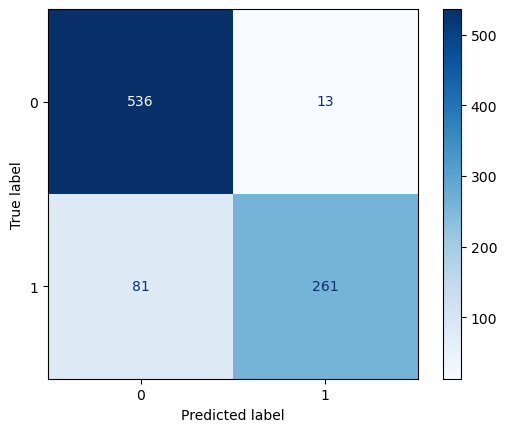

In [41]:
conf_mat_acc(decision_tree)


In [47]:
print(test_set.head(3))
test_set.info()


   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 no

In [60]:
d = test_set['Sex']
df = pd.DataFrame(data=d)
df.replace({'female': 1, 'male': 0})
test_set['Sex'] = df
test_set['Age'] = test_set['Age'].fillna(28.0)
test_set['Alone'] = np.where(
    (test_set['SibSp'] == 0) & (test_set['Parch'] == 0), 1, 0
)


In [61]:
print(test_set.info())
test_set[features].head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Alone        418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB
None


,Sex,Age,Alone,Pclass
0,0,34.5,1,3
1,1,47.0,0,3
2,0,62.0,1,2


In [62]:
X_test = test_set[features]
X_test.shape


(418, 4)

In [63]:
Y_pred_log = log_reg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)


In [64]:
print(Y_pred_log[0:10])


[0 0 0 0 1 0 1 0 1 0]


In [65]:
print(Y_pred_log[0:20])
print(Y_pred_tree[0:20])


[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [76]:
def download_output(y_pred, name):
    output = pd.DataFrame(data={'PassengerId': test_set.PassengerId,
                           'Survived': y_pred})
    output.to_csv(name, index=False)


In [77]:
download_output(Y_pred_log, 'diego_pred_log.csv')
download_output(Y_pred_log, 'diego_pred_tree.csv')
